🔧 **Montando o Google Drive no Google Colab para acesso a base de dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


📚 **Importando bibliotecas**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
pd.set_option('display.max_columns', None)

📂 **Leitura de base de dados**

* Base de dados com informações básicas de clientes, disponível no Kaggle através do seguinte [link](https://www.kaggle.com/datasets/kandij/mall-customers)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Projects/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Verificando a distribuição dos dados**

Indicando o estilo do gráfico, disponível para consulta nesse [link](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [ ]:
plt.style.use('fast')

Gráficos com a distribuição dos dados do dataframe

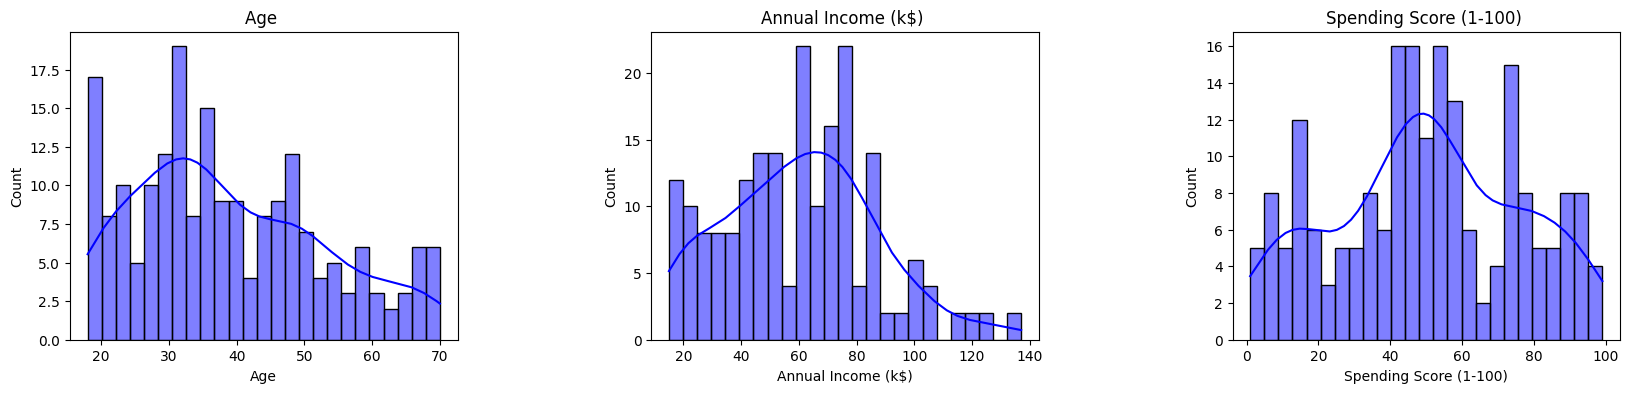

In [ ]:
plt.figure(1, figsize=(20,4))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df[x], bins=25, color='blue', kde=True)
  sns.kdeplot(df=df[x], color='blue', linewidth=2)
  plt.title('{} '.format(x))
plt.show()

### **Comparação dos dados de Idade, Renda Anual e Pontuação de Gastos por Sexo**

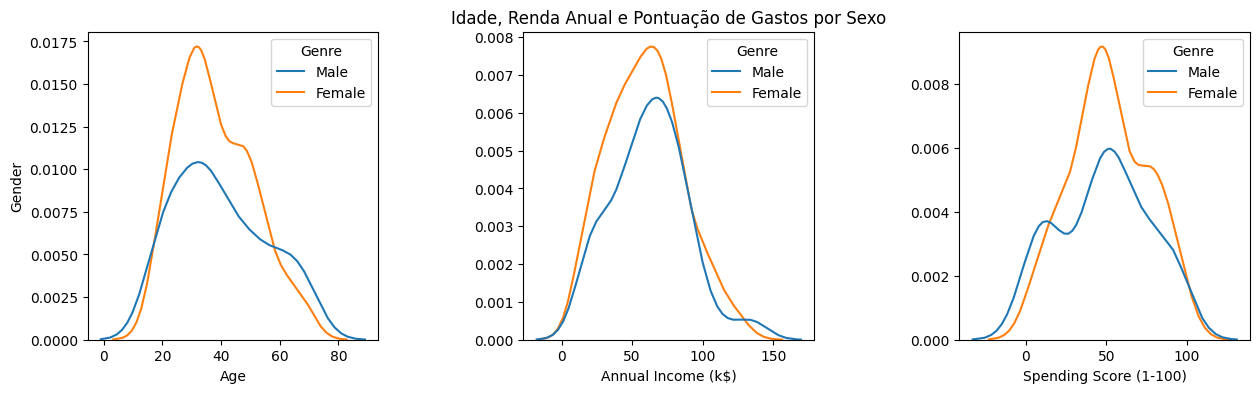

In [ ]:
plt.figure(1, figsize=(15, 4))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.kdeplot(data=df, x=cols, hue='Genre')
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Idade, Renda Anual e Pontuação de Gastos por Sexo' if n==2 else '')
plt.show()

### **Agrupamento de clientes**

* Utilização do algoritmo K-Means
* Técnina não supervisionada

**Selecionando o número de clusters através do método Elbow  (soma das distâncias quadráticas intra clusters).**

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range(1, 11):
  algorithm=(KMeans(n_clusters=n))
  algorithm.fit(X)
  inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

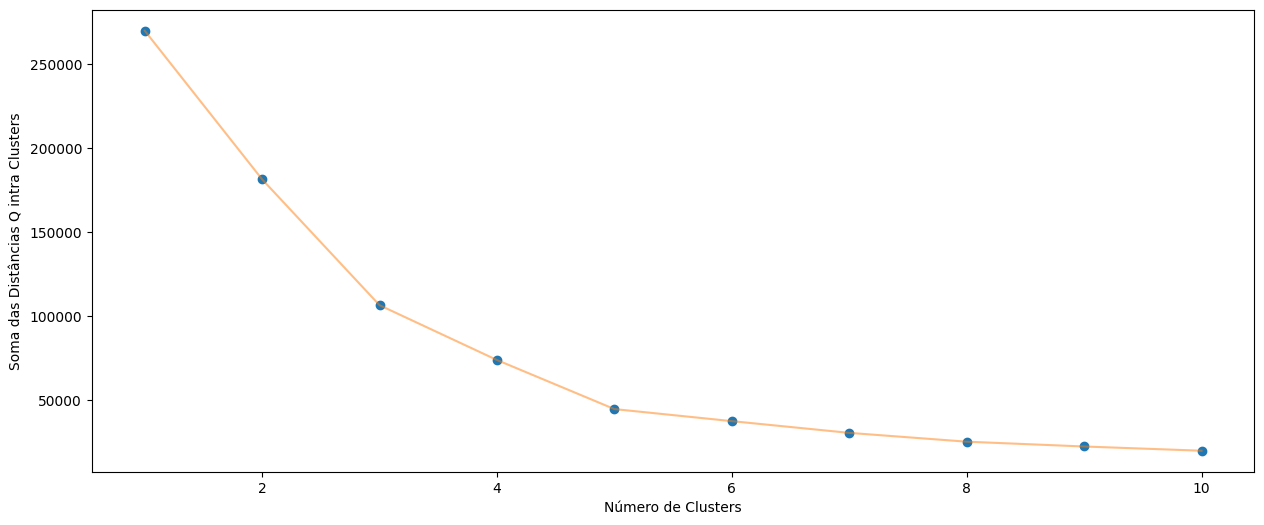

In [ ]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

É possível verificar que o número ideal de clusters é 5, pois valores mais altos que 5 não possuem distâncias/diferenças relevantes entre si.

### **Silhouette score**

* Calcula a distância média intra-cluster e a distância média do cluster mais próximo para cada amostra.
* Quanto mais próximo a 1, significa que a amostra foi atribuída ao cluster correto.
* Disponível para consulta no seguinte [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [ ]:
silhouette_score(X, algorithm.labels_)

0.553931997444648

In [ ]:
valores_k=[]
s=[]

for i in range(2,8):
  kmeans=KMeans(n_clusters=i,random_state=0).fit(X)
  valores_k.append(i)
  s.append(silhouette_score(X, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

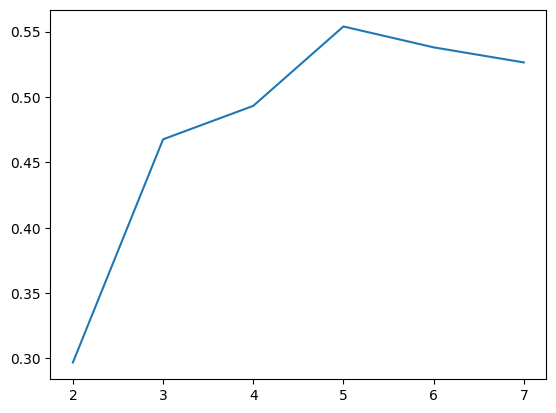

In [ ]:
fig, ax=plt.subplots()

ax.plot(valores_k,s)

plt.show()

No gráfico acima podemos verificar que 5 cluster seria a melhor opção de número de agrupamentos para esse caso.

**Inicializando e Computando o KMeans com o valor de 5 clusters**

In [33]:
algorithm = (KMeans(n_clusters = 5))
algorithm.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

**Visualizando os grupos criados e seus centroides (centros de referência)**

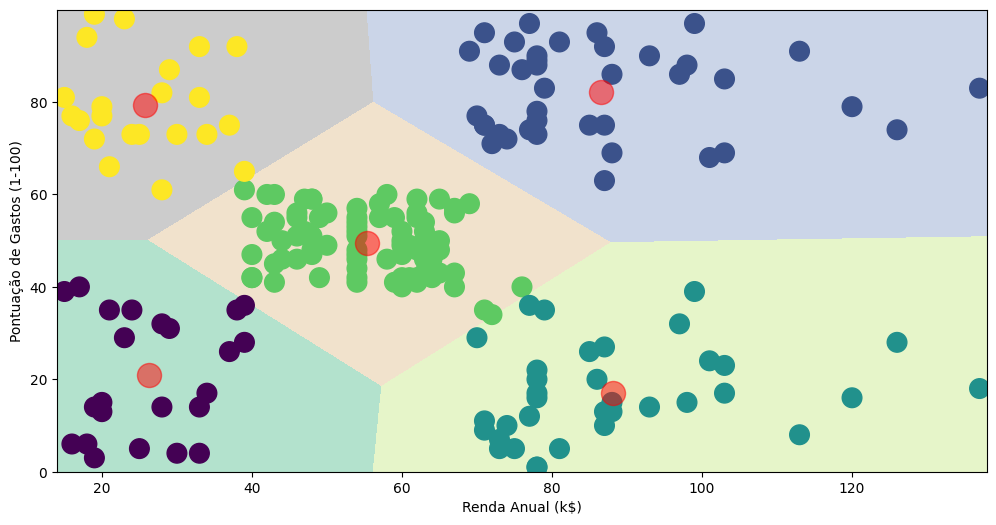

In [34]:
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

h=0.02
x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z=algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(12,6))
plt.clf()
z2 = z.reshape(xx.shape)
plt.imshow(z2, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels, s=200)
plt.scatter(x=centroids[:,0], y=centroids[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Pontuação de Gastos (1-100)'), plt.xlabel('Renda Anual (k$)')
plt.show()

Apesar de ser indicado que o melhor número de cluster é 5, é possível visualizar que existem dados sobrepostos.

**Analisando os dados agrupados**

In [ ]:
# add a coluna 'cluster' correspondente para cada cliente
df['clusters']=algorithm.labels_

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


In [ ]:
# atribuindo df à df_group, exceto as colunas CustomerID e Age
# agrupando por clusters
df_group=df.drop(['CustomerID', 'Age'], axis=1).groupby('clusters')

In [ ]:
df_group.describe()

Annual Income (k$)                                                  \
                      count       mean        std   min    25%   50%    75%   
clusters                                                                      
0                      81.0  55.296296   8.988109  39.0  48.00  54.0  62.00   
1                      23.0  26.304348   7.893811  15.0  19.50  25.0  33.00   
2                      35.0  88.200000  16.399067  70.0  77.50  85.0  97.50   
3                      39.0  86.538462  16.312485  69.0  75.50  79.0  95.00   
4                      22.0  25.727273   7.566731  15.0  19.25  24.5  32.25   

                Spending Score (1-100)                                    \
            max                  count       mean        std   min   25%   
clusters                                                                   
0          76.0                   81.0  49.518519   6.530909  34.0  44.0   
1          39.0                   23.0  20.913043  13.017167   3.0   9.5   
2         137.0                   35.0  17.114286   9.952154   1.0  10.0   
3         137.0                   39.0  82.128205   9.364489  63.0  74.5   
4          39.0                   22.0  79.363636  10.504174  61.0  73.0   

                             
           50%    75%   max  
clusters                     
0         50.0  55.00  61.0  
1         17.0  33.50  40.0  
2         16.0  23.50  39.0  
3         83.0  90.00  97.0  
4         77.0  85.75  99.0

**Inicializando e Computando o KMeans com o valor de 4 clusters**

In [37]:
algorithm2 = (KMeans(n_clusters = 4))
algorithm2.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

**Visualizando os grupos criados e seus centroides (centros de referência)**

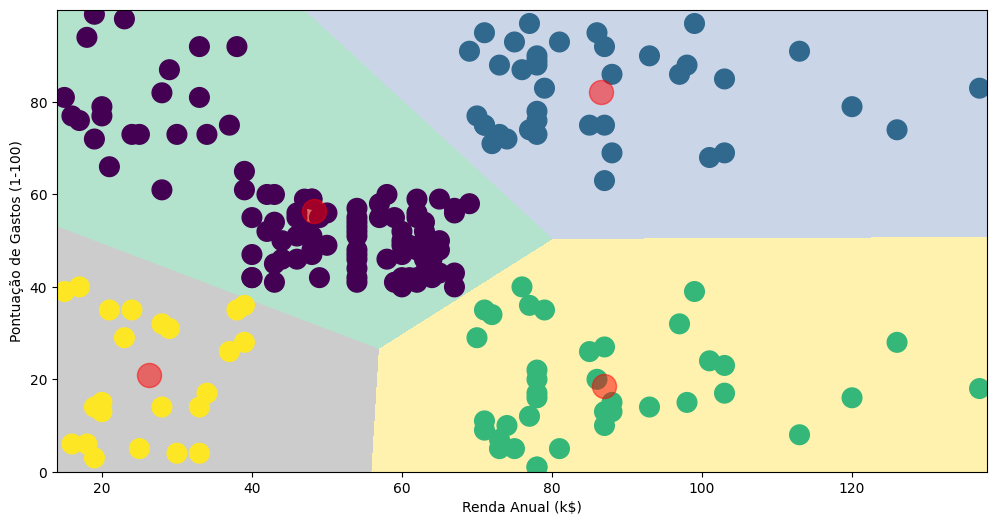

In [38]:
labels2 = algorithm2.labels_
centroids2 = algorithm2.cluster_centers_

h=0.02
x_min, x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z=algorithm2.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize=(12,6))
plt.clf()
z2 = z.reshape(xx.shape)
plt.imshow(z2, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels2, s=200)
plt.scatter(x=centroids2[:,0], y=centroids2[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Pontuação de Gastos (1-100)'), plt.xlabel('Renda Anual (k$)')
plt.show()

Agrupando os clientes em 4 clusters, é possível verificar que a sobreposição de dados diminui.